<a href="https://colab.research.google.com/github/Edersao/Curso_Data_Scientist/blob/main/texto_anotaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Lectura de archivo **Languages.csv**,almacena los códigos de los países y las lenguas habladas, indicando el porcentaje y si es oficial o no.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#para no batallar con .head()
pd.options.display.max_rows = 8
pd.options.display.max_columns = 10

In [4]:
languages=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/1697822132309-Languages.csv')
languages

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
...,...,...,...,...
980,ZWE,English,T,2.2
981,ZWE,Ndebele,F,16.2
982,ZWE,Nyanja,F,2.2
983,ZWE,Shona,F,72.1


Filtremos el dataframe anterior para mantener únicamente la información del idioma español en México y sus fronteras, y las columnas CountryCode y Percentage; así el código para la escritura resultará más legible:

In [6]:
mexico_borders = languages.loc[(languages['CountryCode'].isin(['MEX','USA','BLZ','GTM'])) &
(languages['Language']=='Spanish'),['CountryCode','Percentage']]
mexico_borders.set_index('CountryCode',inplace=True)
mexico_borders

,Percentage
CountryCode,
BLZ,31.6
GTM,64.7
MEX,92.1
USA,7.5


Para incluir, por ejemplo, el porcentaje de personas que hablan español en México
(92.1%) en un gráfico de barras generado del dataframe anterior, puedes utilizar el siguiente código:
````python
plt.text(2,92.1,'92.1%')
````
Puedes incorporarlo a cualquier gráfico, como lo haces con otras propiedades
disponibles únicamente desde Matplotlib.

Con Matplotlib

Text(2, 92.1, '92.1%')

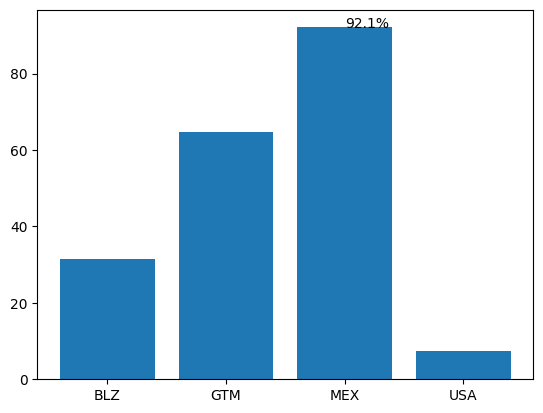

In [8]:
plt.bar(mexico_borders.index,'Percentage',data=mexico_borders)
plt.text(2,92.1,'92.1%')

Con Pandas

Text(2, 92.1, '92.1%')

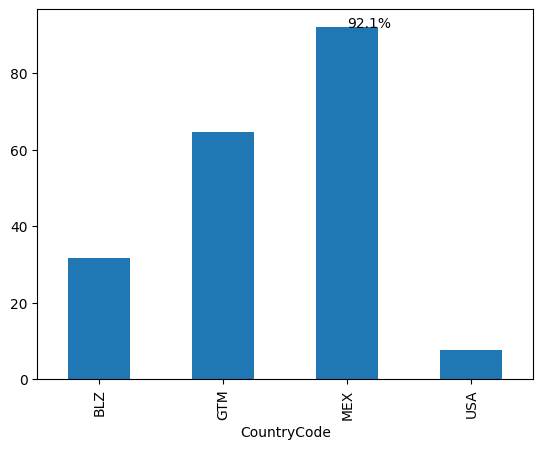

In [9]:
mexico_borders['Percentage'].plot.bar()
plt.text(2,92.1,'92.1%')

Con Seaborn

Text(MEX, 92.1, '92.1%')

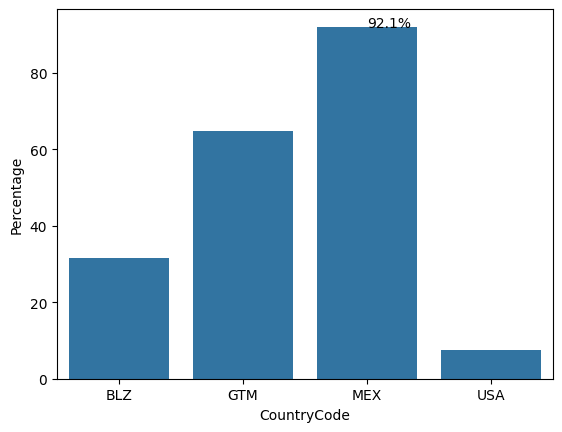

In [11]:
sns.barplot(x=mexico_borders.index,y='Percentage',data=mexico_borders)
#plt.text(2,92.1,'92.1%')
value = mexico_borders.loc['MEX','Percentage']
plt.text('MEX',value,str(value)+'%')

Pero ¿qué pasaría si no conoces directamente el índice a buscar y lo tienes que extraer de una condición? Por ejemplo, si desearas representar el valor del porcentaje máximo en el dataframe (que en este caso coincide con MEX):

In [15]:
value = mexico_borders.loc[mexico_borders['Percentage']==mexico_borders['Percentage'].max(),'Percentage']
value

CountryCode
MEX    92.1
Name: Percentage, dtype: float64

Como ves, el resultado almacenado en value es una serie, y para tener acceso al 92.1, es necesario utilizar la  función to_list() y extraer el primer valor de la misma con el índice 0:

In [16]:
value = mexico_borders.loc[mexico_borders['Percentage']==mexico_borders['Percentage'].max(),'Percentage']
value = value.to_list()[0]
value

92.1

Puedes indicar la ubicación seleccionando un sistema de coordenadas diferente a través del parámetro transform. Este te permite posicionar el texto en:

Text(220, 150, '92.1%')

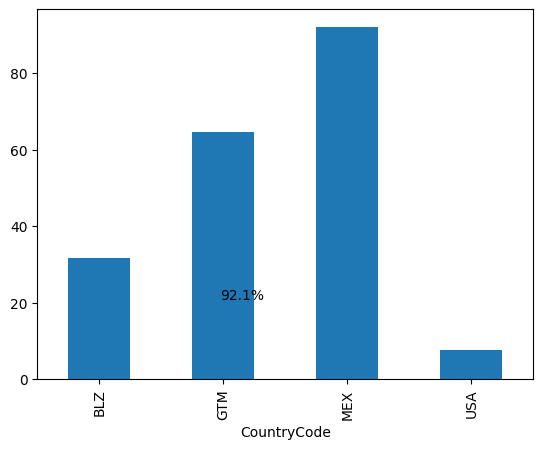

In [17]:
#Un pixel en específico:
mexico_borders['Percentage'].plot.bar()
plt.text(220,150,'92.1%',transform=None)

Text(0.58, 0.5, '92.1%')

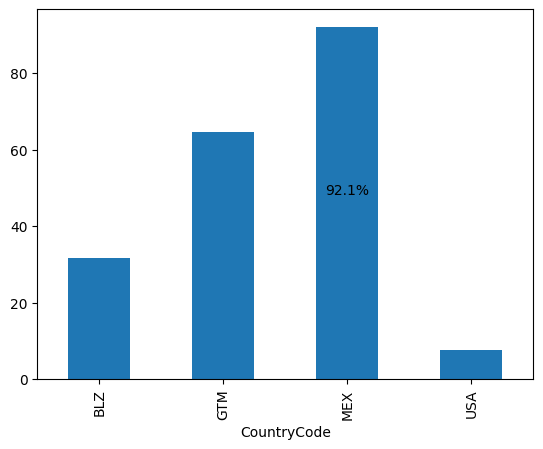

In [18]:
#Relación a los ejes:
ax = mexico_borders['Percentage'].plot.bar()
plt.text(0.58,0.5,'92.1%',transform=ax.transAxes)

Text(0.58, 0.5, '92.1%')

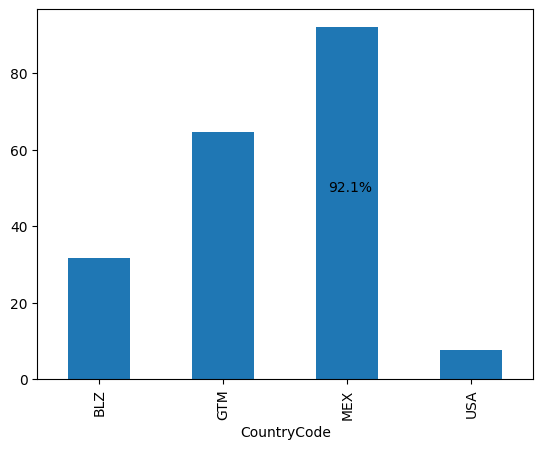

In [19]:
#Relación a la figura:
fig,ax = plt.subplots()
mexico_borders['Percentage'].plot.bar(ax=ax)
plt.text(0.58,0.5,'92.1%',transform=fig.transFigure)

Observa que cuando usas los ejes o la figura como referencia para las coordenadas, debes generar el objeto de gráfica (ax) o el contenedor (fig), respectivamente, y se considera que (0,0) es el límite inferior izquierdo y (1,1) es el límite superior derecho.

Hay muchas propiedades del texto que podrás personalizar. El siguiente código muestra algunas de ellas:

Text(2, 92.1, '92.1%')

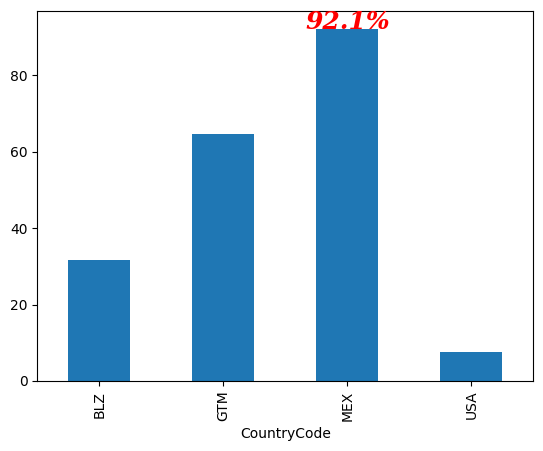

In [21]:
fig,ax = plt.subplots()
mexico_borders['Percentage'].plot.bar(ax=ax)
plt.text(2,92.1,'92.1%',family='serif',fontsize=18,fontweight='bold',style='italic',
color='red',horizontalalignment='center')

También puedes pasar las propiedades anteriores como un diccionario a la función text():

Text(2, 92.1, '92.1%')

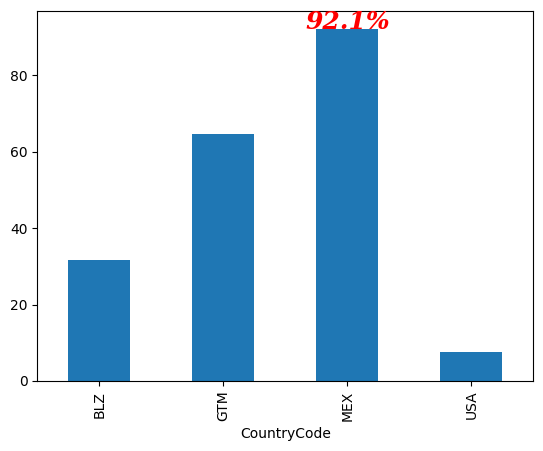

In [23]:
fig,ax = plt.subplots()
mexico_borders['Percentage'].plot.bar(ax=ax)
props_font = {'family': 'serif',
'size': 18,
'weight': 'bold',
'style': 'italic',
'color': 'red',
'horizontalalignment': 'center'}
plt.text(2,92.1,'92.1%',fontdict=props_font)

resaltandolo

Text(2, 92.1, '92.1%')

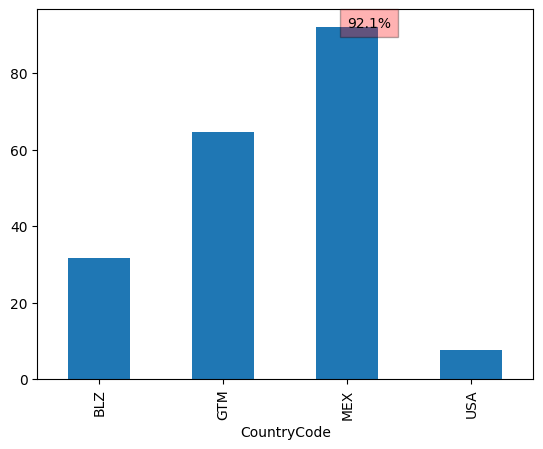

In [24]:
fig,ax = plt.subplots()
mexico_borders['Percentage'].plot.bar(ax=ax)
plt.text(2,92.1,'92.1%',bbox=dict(facecolor='red',alpha=0.3,pad=5))

Text(2, 92.1, '92.1%')

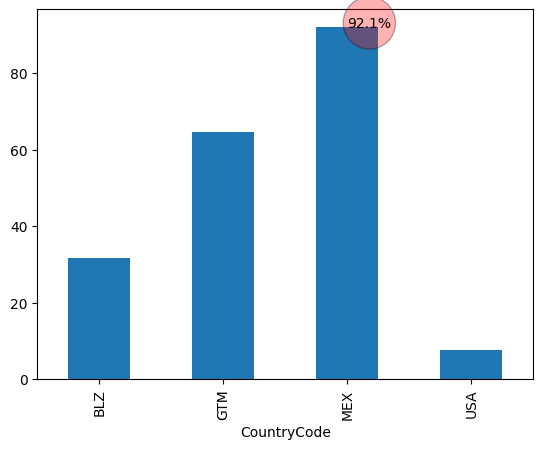

In [25]:
fig,ax = plt.subplots()
mexico_borders['Percentage'].plot.bar(ax=ax)
props_bbox = {'boxstyle': 'circle',
'facecolor': 'red',
'alpha': 0.3}
plt.text(2,92.1,'92.1%',bbox=props_bbox)

Para incluir los valores de todos los países, es necesario que hagas un recorrido por las filas del dataframe con un ciclo y extraer el porcentaje de hablantes con

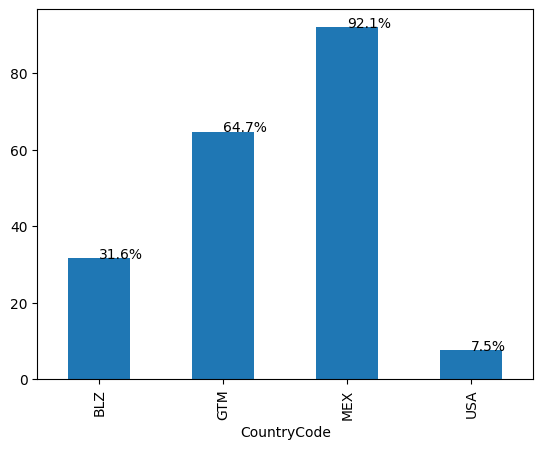

In [26]:
mexico_borders['Percentage'].plot.bar()
for i in range(mexico_borders.shape[0]):
  plt.text(i,mexico_borders.iloc[i,0],str(mexico_borders.iloc[i,0])+'%')

Además de texto, puedes insertar líneas horizontales y/o verticales para indicar ciertos valores relevantes o de referencia, utilizando las funciones axhline() y axvlines(). Si en los gráficos anteriores quisieras añadir, por ejemplo, el promedio de hablantes del español en todos los países
que incluyen este idioma, podrías hacer:

Text(-0.4, 66.05, '$\\frac{\\sum_{i=1}^\\# percentage_i}{\\#}=$66.05%')

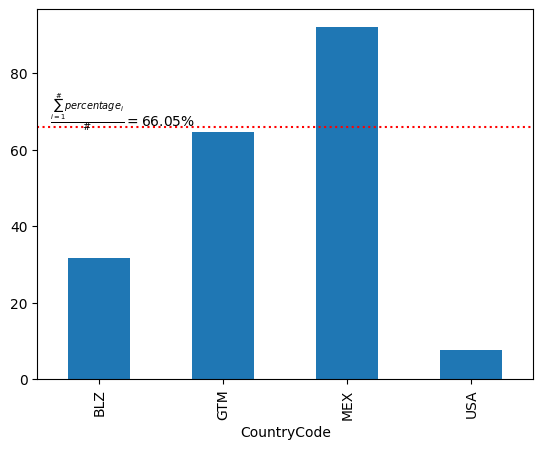

In [29]:
fig,ax = plt.subplots()
mexico_borders['Percentage'].plot.bar(ax=ax)
spanish_mean = (languages.loc[languages['Language']=='Spanish','Percentage']).mean()
plt.axhline(y=spanish_mean,color='red',linestyle=':')
plt.text(-0.4,spanish_mean,r'$\frac{\sum_{i=1}^\# percentage_i}{\#}=$'
+str(f'{spanish_mean:.2f}')+'%')

Habrá casos en los que además de ubicar un texto en una posición determinada del gráfico,
necesites puntualizar en alguna característica. Para ello, puedes usar la función annotate(), que además de considerar la ubicación del texto, recibe la ubicación de la anotación. Ambas ubicaciones deben ser enviadas como tuplas (x,y). Para probar su funcionamiento, veamos cómo están distribuidas todas las lenguas en México:

In [30]:
mexico = languages.loc[languages['CountryCode']=='MEX',['Language','Percentage']]
mexico.set_index('Language',inplace=True)

Usaremos un gráfico circular para representarlas, pero antes incluyamos una nueva categoría (Others) para completar el 100% de los hablantes:

In [31]:
mexico.loc['Others']=[100 - mexico['Percentage'].sum()]

<Axes: ylabel='Percentage'>

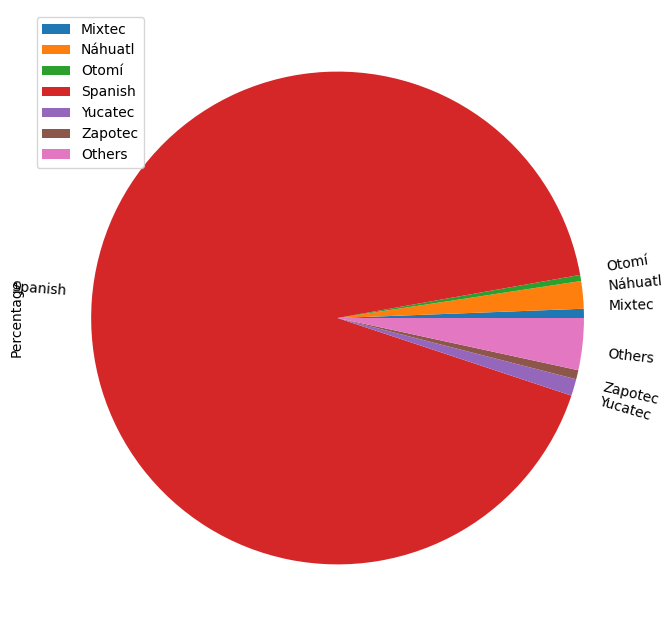

In [32]:
mexico.plot.pie(y='Percentage',labels=mexico.index,rotatelabels=True,figsize=(8,8))

Para tener mayor detalle, dejemos únicamente las lenguas no oficiales:

Text(1, 1, '(0,0)')

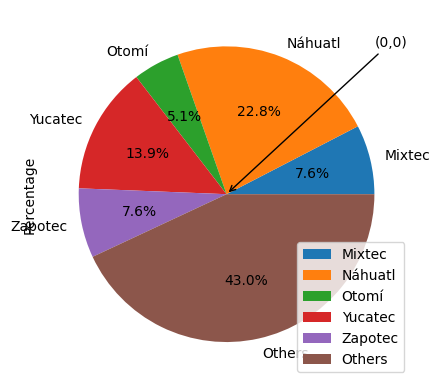

In [34]:
mexico_unofficial = mexico.drop(mexico.loc[mexico.index=='Spanish'].index)
mexico_unofficial.plot.pie(y='Percentage',labels=mexico_unofficial.index,autopct='%1.1f%%')
plt.annotate('(0,0)',xy=(0,0),xytext=(1,1),arrowprops=dict(arrowstyle='->'))

Text(1, 1, '(0,0)')

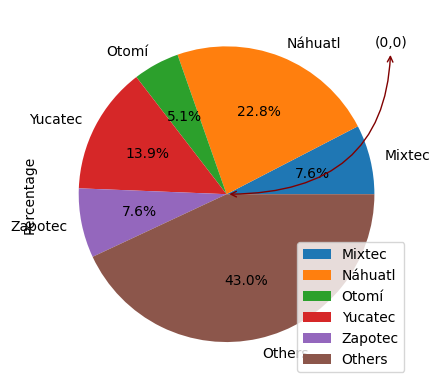

In [35]:
mexico_unofficial = mexico.drop(mexico.loc[mexico.index=='Spanish'].index)
mexico_unofficial.plot.pie(y='Percentage',labels=mexico_unofficial.index,autopct='%1.1f%%')
plt.annotate('(0,0)',xy=(0,0),xytext=(1,1), arrowprops=dict(arrowstyle='<->', connectionstyle='angle3',color='maroon'))

Text(1, 0.6, '1.8% including Spanish')

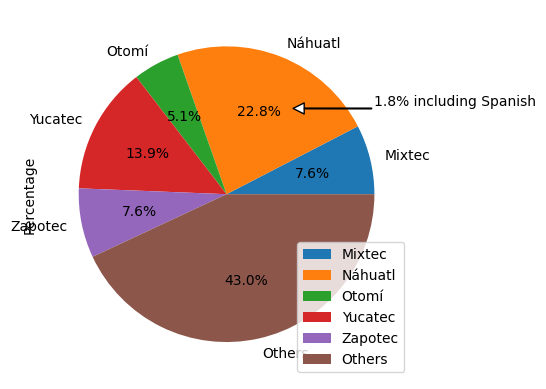

In [36]:
mexico_unofficial = mexico.drop(mexico.loc[mexico.index=='Spanish'].index)
mexico_unofficial.plot.pie(y='Percentage',labels=mexico_unofficial.index,autopct='%1.1f%%')
props_arrow = {'facecolor':'white',
'width':0.5,
'headwidth':8,
'headlength':8}
plt.annotate('1.8% including Spanish', xy=(0.45,0.58),xytext=(1,0.6),arrowprops=props_arrow )